In [12]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#importing the dataset
df=pd.read_csv("/content/hours_vs_pass_custom.csv")
df

,Hours_Studied,Passed
0,3.745401,0
1,9.507143,1
2,7.319939,1
3,5.986585,0
4,1.560186,0
...,...,...
995,0.915821,0
996,9.173136,1
997,1.368186,0
998,9.502374,1


In [14]:
#Feature Extacting
x=np.array(df["Hours_Studied"])
y=np.array(df["Passed"])

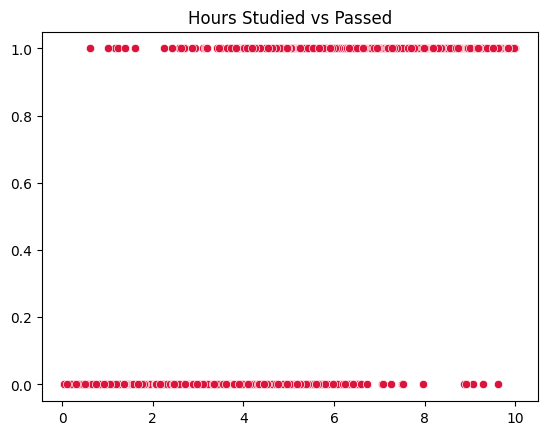

In [15]:
#Visualizing the data
def DS_plot(x,y):
  sns.scatterplot(x=x,y=y,color="crimson")
  plt.title("Hours Studied vs Passed")
  plt.show()
DS_plot(x,y)

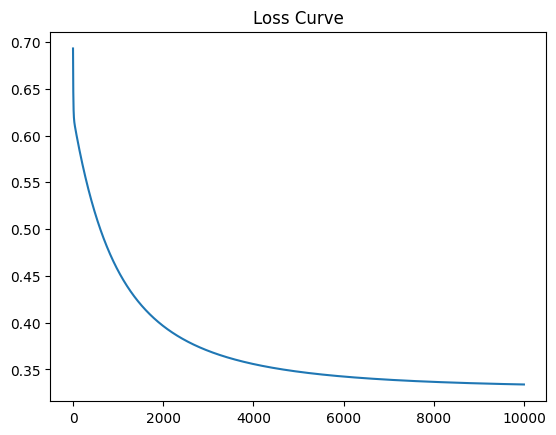

0.3732970465597452


In [16]:
#Sigmoid function
def sigmoid(x):
  return (1/(1+np.exp(-x)))
#Model
def Logistic_Regression(x,y,learning_rate,epoch):
    #Initialization
    wights=0
    bias=0
    loss=[]
    m=len(y)
    #Training with Gradient descent
    for i in range(epoch):
      lin_f=wights*x+bias
      pred=sigmoid(lin_f)     #using Sigmoid function to convert the linear values to values between 0 and 1
      epsilon = 1e-15
      pred=np.clip(pred,epsilon,1-epsilon)      #using epsilon to restrict values like Log(0)
      BCE_loss=-(y*np.log(pred)+(1-y)*np.log(1-pred))     #Binary cross entropy loss
      loss.append(np.mean(BCE_loss))

      dw=(1/m)*np.dot(pred-y,x)
      db=(1/m)*np.sum(pred-y)

      wights=wights-learning_rate*dw      #Updating the wights and bias
      bias=bias-learning_rate*db

    plt.plot(loss)
    plt.title("Loss Curve")
    plt.show()

    return wights,bias,loss
weight,bias,loss=Logistic_Regression(x,y,0.01,10000)
print(np.mean(loss))
#Prediction
def CUS_PRED(x,weight,bias):
  lin_f=weight*x+bias
  pred=sigmoid(lin_f)
  return pred
pred=CUS_PRED(x,weight,bias)

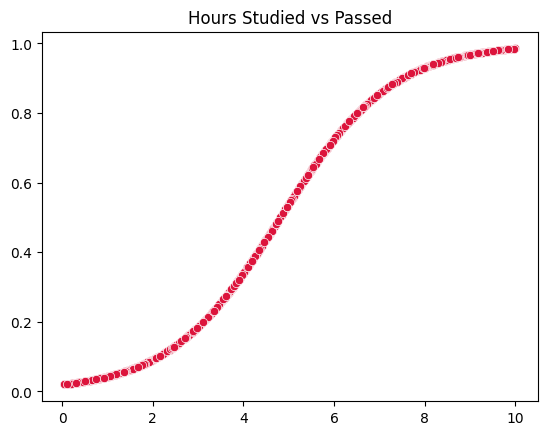

In [17]:
DS_plot(x,pred)

In [18]:
#Classifiying based on predicted probabilities
class_pred=[]
for i in pred:
  if(i>=0.5):
    class_pred.append(1)
  else:
    class_pred.append(0)

In [19]:
#importing Logistic Regession
from sklearn.linear_model import LogisticRegression

In [20]:
#Training
def SKLOG(x,y):
  x_2d = x.reshape(-1, 1)
  y_2d = y.reshape(-1, 1)
  model_sk =LogisticRegression()
  model_sk.fit(x_2d,y_2d)
  y_pred_sk=model_sk.predict(x_2d)
  y_flat_sk=y_pred_sk.flatten()

  return y_flat_sk,model_sk,x_2d
y_flat_sk,model_sk,x_2d=SKLOG(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#Loss comparison of both Models
from sklearn.metrics import log_loss

def Model_accuracy(y, pred_probs, x_2d, model_sklearn):
    sklearn_probs = model_sklearn.predict_proba(x_2d)[:, 1]

    logloss_sklearn = log_loss(y, sklearn_probs)
    logloss_custom = log_loss(y, pred_probs)

    print(f"Sklearn Log Loss: {logloss_sklearn:.4f}")
    print(f"Custom Model Log Loss: {logloss_custom:.4f}")
Model_accuracy(y,pred,x_2d,model_sk)

Sklearn Log Loss: 0.3304
Custom Model Log Loss: 0.3338


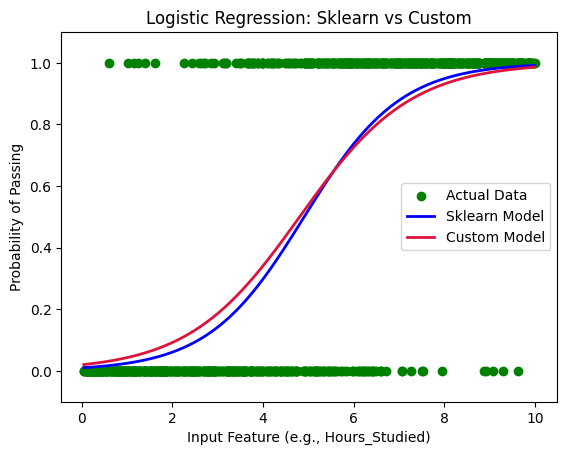

In [22]:
#Generating a smooth range of x values (for curve plotting)
x_vals = np.linspace(min(x_2d)[0], max(x_2d)[0], 300).reshape(-1, 1)

sklearn_probs = model_sk.predict_proba(x_vals)[:, 1]
custom_probs = CUS_PRED(x_vals,weight,bias)

#Plotting actual data
plt.scatter(x_2d, y, color='green', label='Actual Data')

#Plotting sklearn model's curve
plt.plot(x_vals, sklearn_probs, color='blue', label='Sklearn Model', linewidth=2)

#Plotting custom model's curve
plt.plot(x_vals, custom_probs, color='crimson', label='Custom Model', linewidth=2)

plt.xlabel("Input Feature (e.g., Hours_Studied)")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Sklearn vs Custom")
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()
